# Surface content

In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.basemap import Basemap, cm
import cmocean
import netCDF4 as nc
from datetime import date

%matplotlib inline

###### Parameters:

In [3]:
imin, imax = 1480, 2180
jmin, jmax = 160, 800
isize = imax - imin
jsize = jmax - jmin

# model results:
year = 2015
results_folder1 = f'/data/brogalla/run_storage/Mn-reference-202103/ref-{year}-202103/'

###### Load files:

In [4]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/data/ANHA12/ANHA12_mesh1.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

In [5]:
ref   = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc',  'r')
lons  = np.array(ref.variables['nav_lon'])
lats  = np.array(ref.variables['nav_lat'])
depth = np.array(ref.variables['deptht'])

In [6]:
results1  = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc')
dissolmn1 = np.array(results1.variables['dissolmn'][:,0,:,:,:])*10**9 # nM units
oxidismn1 = np.array(results1.variables['oxidismn'][:,0,:,:,:])*10**9 # nM units

In [7]:
mask      = nc.Dataset('/ocean/brogalla/GEOTRACES/ariane_runs/ANHA12_Ariane_mesh.nc')
tmask     = np.array(mask.variables['tmask'])[0,:,imin:imax,jmin:jmax]
land_mask = np.ma.masked_where((tmask[:,:,:] > 0.1), tmask[:,:,:]) 

e1t_base = np.array(mask.variables['e1t'])[0,imin:imax,jmin:jmax]
e2t_base = np.array(mask.variables['e2t'])[0,imin:imax,jmin:jmax]
e3t      = np.array(mask.variables['e3t_0'])[0,:,imin:imax,jmin:jmax]

e1t      = np.tile(e1t_base, (50,1,1))
e2t      = np.tile(e2t_base, (50,1,1))
volume   = e1t*e2t*e3t

##### Functions:

In [8]:
def plot_layer(month, layer, variable, vmin=0,vmax=35, savefig=False):
    
    plot_var = np.mean(variable[month,3:17,:,:], axis=0)
    
    fig, ax1, proj1 = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/mn-reference.pickle','rb'))

    x, y = proj1(lons, lats)

    contour = proj1.contourf(x, y, plot_var, np.arange(vmin,vmax+1,1),\
                             cmap=cmocean.cm.dense, vmin=vmin, vmax=vmax, extend='both')

    cbar_ax = fig.add_axes([0.72, 0.14, 0.04, 0.6])
    cbar    = fig.colorbar(contour, cax=cbar_ax, ticks=[0,2,4,6,8,10,12,14])
    cbar.set_label('Dissolved Mn [nM]', fontsize=8) 
    cbar_ax.tick_params(axis='both', which='major', labelsize=8)
    
    figure = plt.gcf()
#     figure.set_size_inches(4.5*1.8, 3.7)
    figure.set_size_inches(4.5*2.8, 3.7*2)
    
    return

# Surface content over the years

In [57]:
years = np.arange(2002,2020,1)
dmn   = np.zeros_like(years)
omn   = np.zeros_like(years)

for y, year in enumerate(years):
    results_folder1 = f'/data/brogalla/run_storage/Mn-reference-202103/ref-{year}-202103/'
    results1  = nc.Dataset(f'{results_folder1}ANHA12_EXH006_{year}_monthly.nc')
    dissolmn1 = np.sum(np.array(results1.variables['dissolmn'][:,0,:,:,:]),axis=(1,2,3,0))*10**9 # nM units
    oxidismn1 = np.sum(np.array(results1.variables['oxidismn'][:,0,:,:,:]),axis=(1,2,3,0))*10**9 # nM units
    
    dmn[y] = dissolmn1
    omn[y] = oxidismn1

(2002.0, 2020.0)

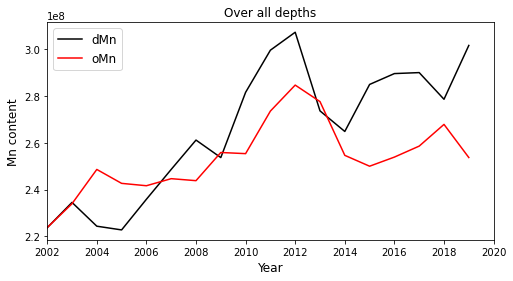

In [58]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(years, dmn, '-k', label='dMn')
ax.plot(years, omn, '-r', label='oMn')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Mn content', fontsize=12)
ax.legend(fontsize=12)

ax.set_title('Over all depths', fontsize=12)
ax.set_xlim(2002,2020)

(2002.0, 2020.0)

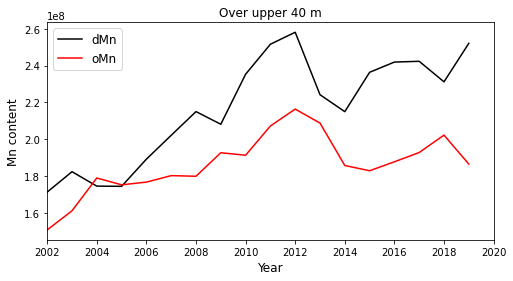

In [55]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(years, dmn, '-k', label='dMn')
ax.plot(years, omn, '-r', label='oMn')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Mn content', fontsize=12)
ax.legend(fontsize=12)

ax.set_title('Over upper 40 m', fontsize=12)
ax.set_xlim(2002,2020)

(2002.0, 2020.0)

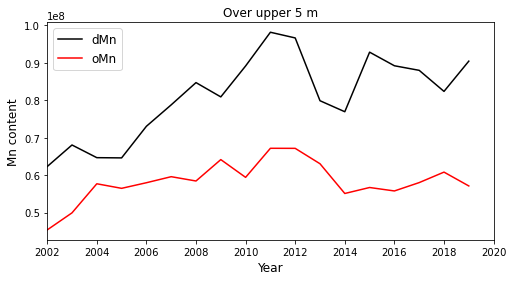

In [53]:
fig, ax = plt.subplots(1,1, figsize=(8,4))

ax.plot(years, dmn, '-k', label='dMn')
ax.plot(years, omn, '-r', label='oMn')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Mn content', fontsize=12)
ax.legend(fontsize=12)

ax.set_title('Over upper 5 m', fontsize=12)
ax.set_xlim(2002,2020)

# 2015:

##### Figures of surface concentrations:

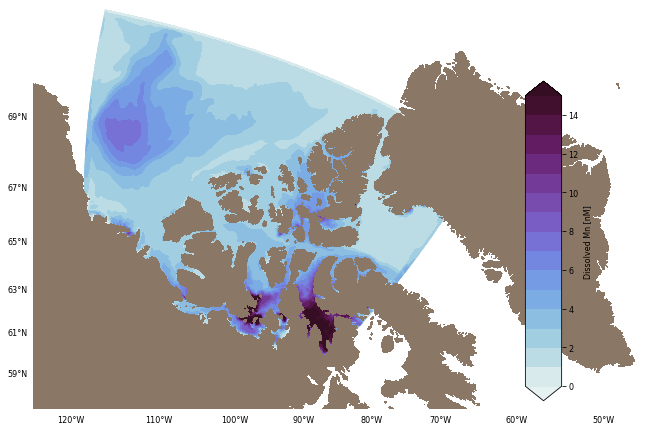

In [26]:
plot_layer(3,0,dissolmn1,vmin=0,vmax=15, savefig=False)

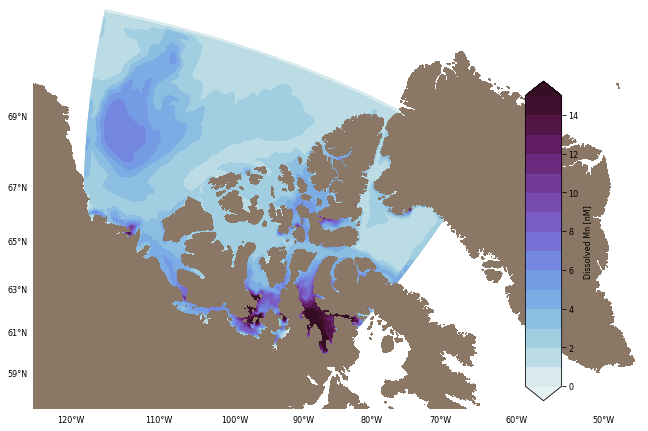

In [27]:
plot_layer(4,0,dissolmn1,vmin=0,vmax=15, savefig=False)

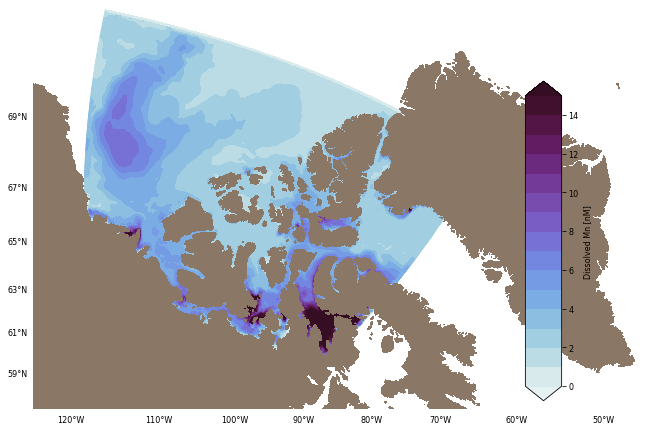

In [25]:
plot_layer(5,0,dissolmn1,vmin=0,vmax=15, savefig=False)

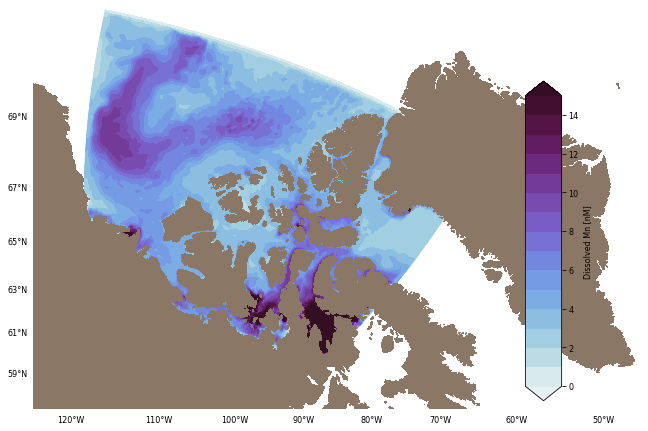

In [19]:
plot_layer(6,0,dissolmn1,vmin=0,vmax=15, savefig=False)

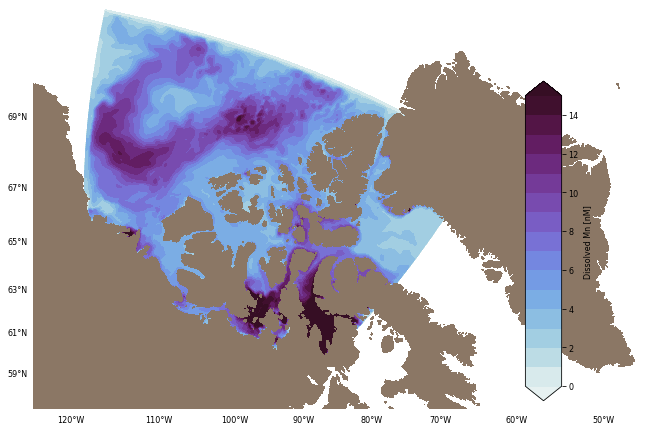

In [20]:
plot_layer(7,0,dissolmn1,vmin=0,vmax=15, savefig=False)

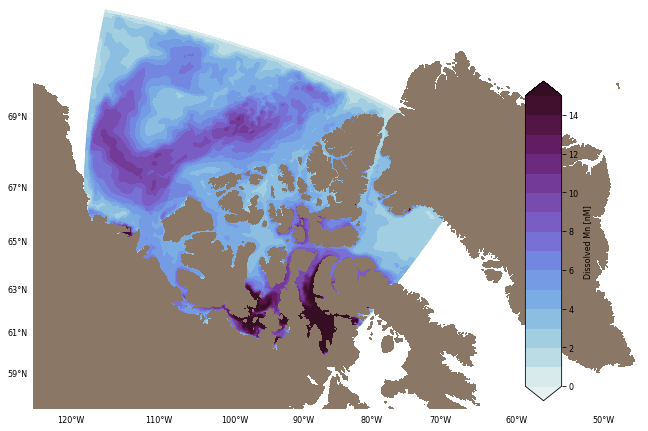

In [21]:
plot_layer(8,0,dissolmn1,vmin=0,vmax=15, savefig=False)

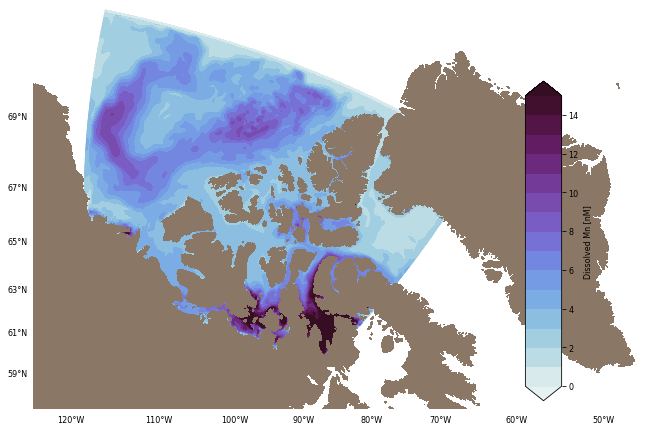

In [22]:
plot_layer(9,0,dissolmn1,vmin=0,vmax=15, savefig=False)

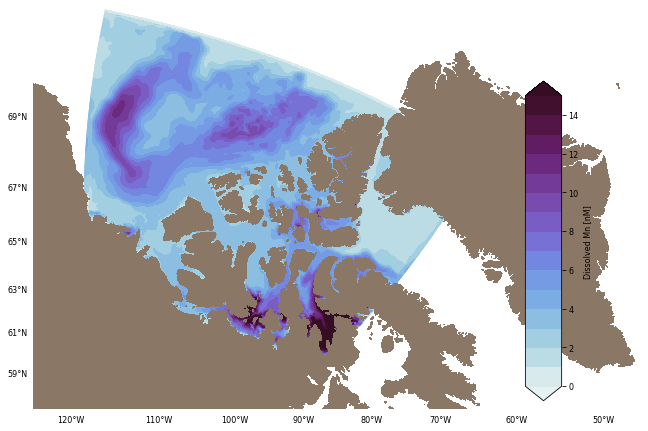

In [23]:
plot_layer(10,0,dissolmn1,vmin=0,vmax=15, savefig=False)

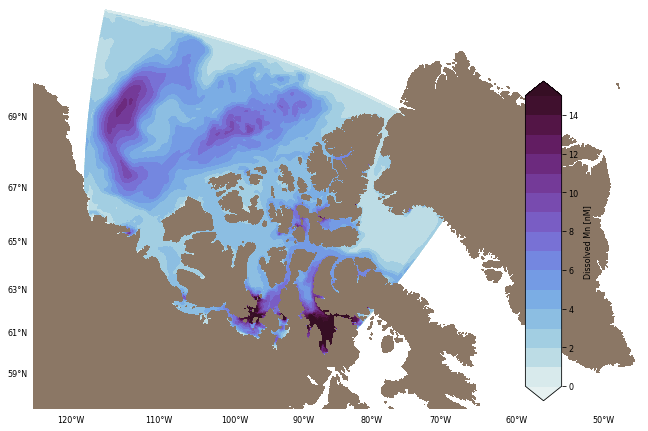

In [24]:
plot_layer(11,0,dissolmn1,vmin=0,vmax=15, savefig=False)

# Oxidised Mn

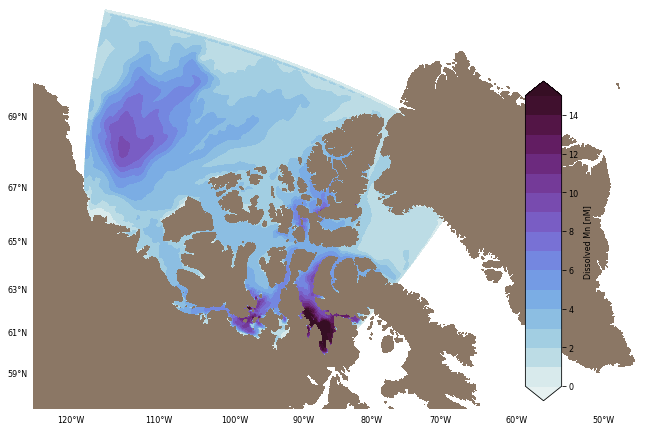

In [35]:
plot_layer(0,0,oxidismn1,vmin=0,vmax=15, savefig=False)

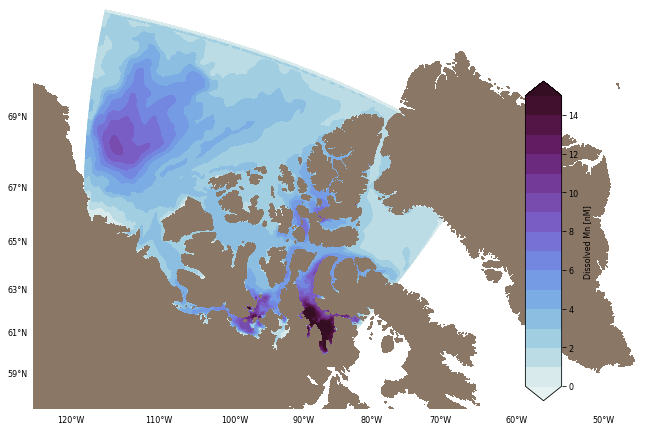

In [36]:
plot_layer(1,0,oxidismn1,vmin=0,vmax=15, savefig=False)

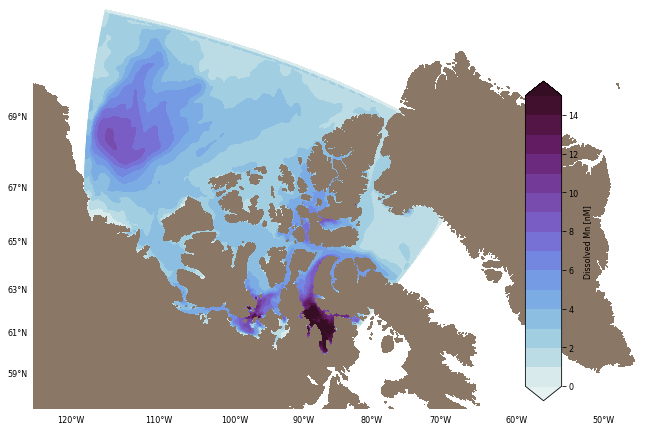

In [37]:
plot_layer(2,0,oxidismn1,vmin=0,vmax=15, savefig=False)

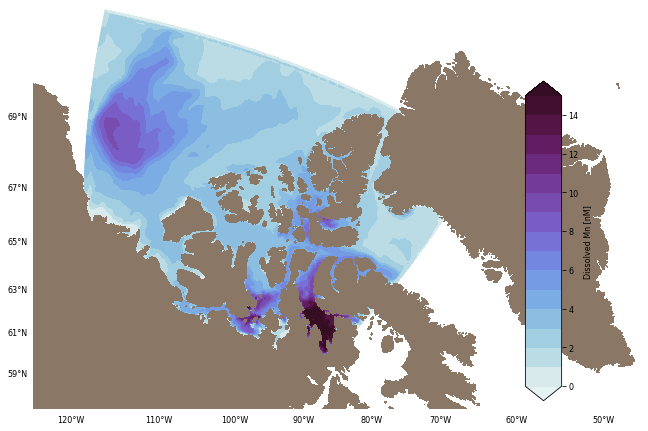

In [38]:
plot_layer(3,0,oxidismn1,vmin=0,vmax=15, savefig=False)

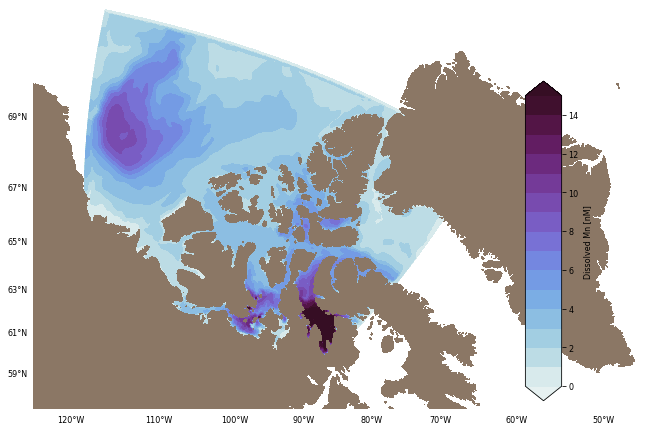

In [39]:
plot_layer(4,0,oxidismn1,vmin=0,vmax=15, savefig=False)

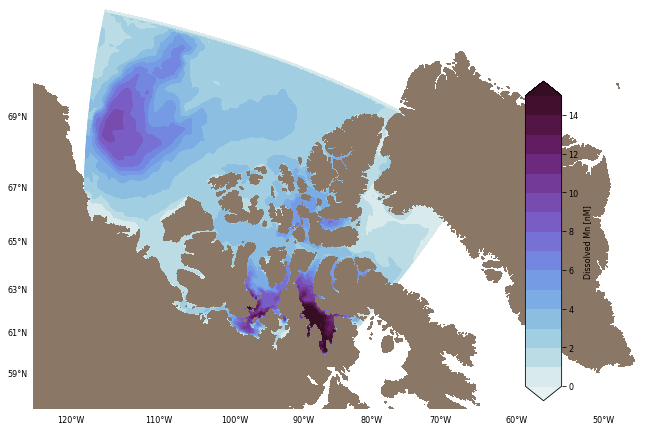

In [40]:
plot_layer(5,0,oxidismn1,vmin=0,vmax=15, savefig=False)

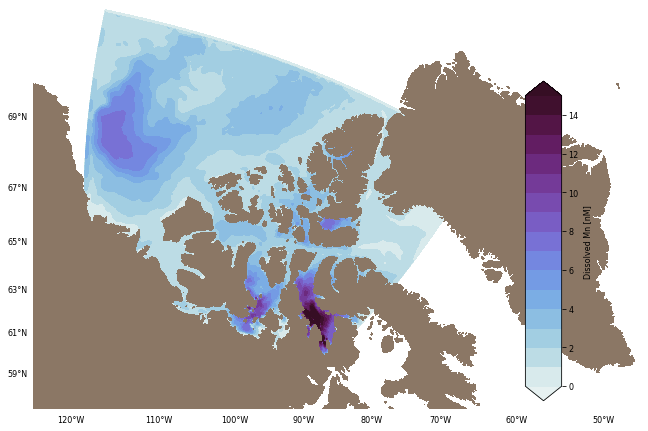

In [41]:
plot_layer(6,0,oxidismn1,vmin=0,vmax=15, savefig=False)

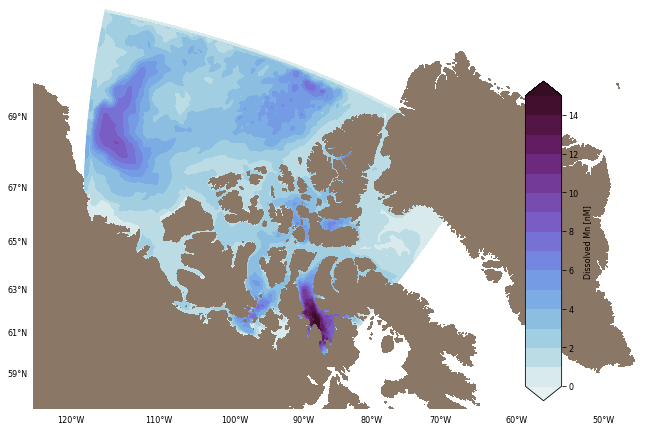

In [34]:
plot_layer(7,0,oxidismn1,vmin=0,vmax=15, savefig=False)

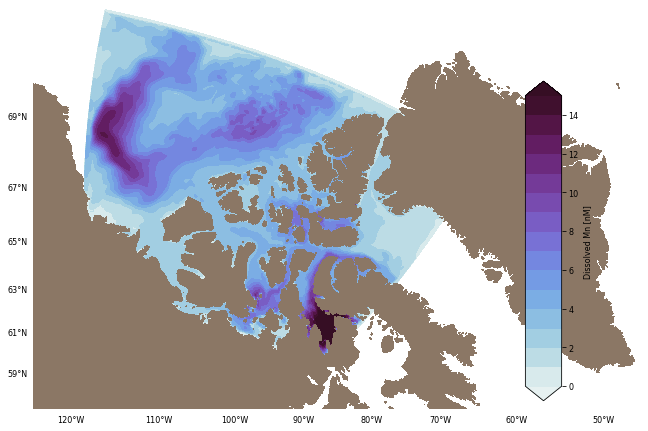

In [31]:
plot_layer(8,0,oxidismn1,vmin=0,vmax=15, savefig=False)

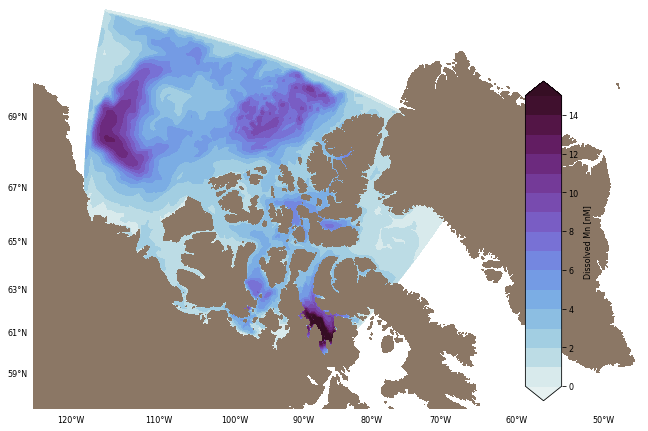

In [29]:
plot_layer(9,0,oxidismn1,vmin=0,vmax=15, savefig=False)

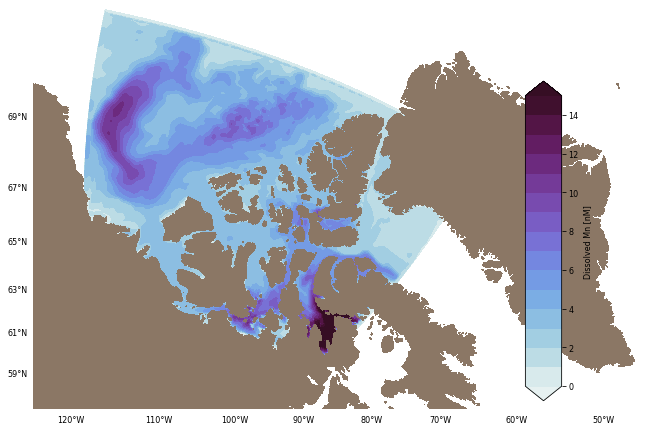

In [32]:
plot_layer(10,0,oxidismn1,vmin=0,vmax=15, savefig=False)

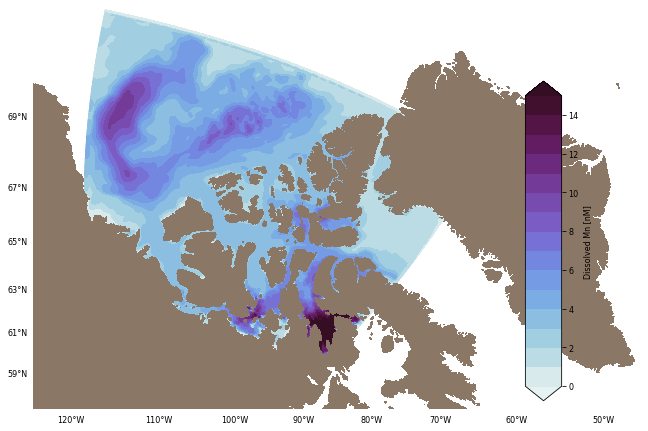

In [33]:
plot_layer(11,0,oxidismn1,vmin=0,vmax=15, savefig=False)